In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [6]:
experiment_name = 'P3856'
feature_detection_method = 'pasef'

# BASE_RESULTS_DIR = '/media/big-ssd/results-{}'.format(experiment_name)
BASE_RESULTS_DIR = '/Users/darylwilding-mcbride/Downloads/results-{}'.format(experiment_name)

IDENTIFICATIONS_DIR = '{}/P3856-results-cs-true-fmdw-true-2021-05-16-18-13-29/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_DIR, experiment_name, feature_detection_method)

In [7]:
IDENTIFICATIONS_FILE

'/Users/darylwilding-mcbride/Downloads/results-P3856/P3856-results-cs-true-fmdw-true-2021-05-16-18-13-29/identifications-pasef/exp-P3856-identifications-pasef-recalibrated.pkl'

In [8]:
MAXIMUM_Q_VALUE = 0.01

#### identifications

In [9]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_df = d['identifications_df']
identifications_df = identifications_df[(identifications_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

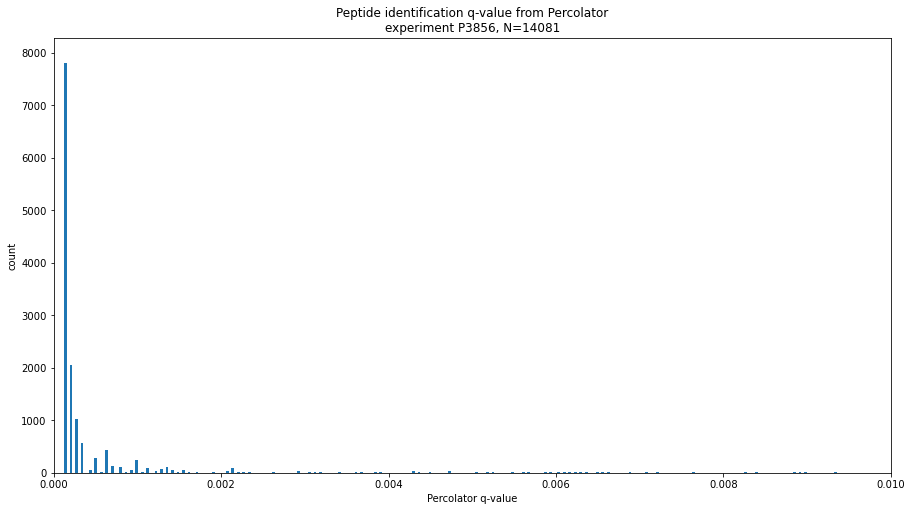

In [13]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = identifications_df['percolator q-value']
y, x, _ = ax1.hist(values, bins=bins)
mean = np.mean(values)
# ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')

plt.xlabel('Percolator q-value')
plt.ylabel('count')
plt.title('Peptide identification q-value from Percolator\nexperiment {}, N={}'.format(experiment_name,len(identifications_df)))
plt.xlim((0,0.01))
# plt.ylim((0,1000))

plt.show()

In [15]:
identifications_df.sample(n=10)

,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,intensity_without_saturation_correction,intensity_with_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
82990,1008.472302,1008.536543,266.0,245,291,2090.779963,2087.603752,2093.956468,41719.0,51957.0,...,0.000199,0.001380,13700.6,ISLGLPVGAIMNCADNSGAR,"sp|P0CX42|RL23B_YEAST,sp|P0CX41|RL23A_YEAST",RN,2014.992670,2014.992764,-0.046719,-0.000094
78401,781.028776,781.078529,638.0,619,658,2065.904414,2062.199575,2069.077685,4375.0,4375.0,...,0.000199,0.001714,13700.6,VLGSVGEPISPDLWEWYHEK,sp|P52910|ACS2_YEAST,RV,2340.144948,2340.142600,1.003481,0.002348
30787,990.411310,990.474400,255.0,219,294,1827.758085,1822.464558,1830.405171,18772.0,18772.0,...,0.000126,0.000066,13700.6,FSGWYDADLSPAGHEEAK,sp|P18669|PGAM1_HUMAN,RR,1978.872893,1978.869700,1.613361,0.003193
42572,682.808004,682.851500,665.0,641,690,1885.443187,1876.977672,1888.620075,3409.0,3409.0,...,0.000271,0.005841,13700.6,IFDIDEAEEGVK,sp|P20042|IF2B_HUMAN,KD,1363.649760,1363.650700,-0.689110,-0.000940
72041,736.670632,736.717559,676.0,653,697,2032.035375,2027.272889,2036.797901,4731.0,4731.0,...,0.000126,0.000376,13700.6,FGAVFLWDSGSSVGEITGHNK,sp|O75083|WDR1_HUMAN,KV,2207.065876,2207.064700,0.533045,0.001176
101449,970.931070,970.992920,266.0,225,287,2186.574076,2182.870203,2189.750594,9530.0,9530.0,...,0.000199,0.001094,13700.6,LLELFTDLSCNPEMMK,sp|Q5VW32|BROX_HUMAN,RN,1939.910362,1939.909364,0.514396,0.000998
27467,881.430922,881.487070,362.0,362,382,1813.996753,1809.233435,1817.702547,5045.0,5045.0,...,0.000499,0.016730,13700.6,ISQSNYIPTQQDVLR,sp|P08754|GNAI3_HUMAN,RT,1760.905492,1760.905700,-0.118249,-0.000208
76454,1095.450761,1095.520542,161.0,133,186,2055.849226,2052.674951,2059.025818,4023.0,4023.0,...,0.000199,0.002024,13700.6,IGGPCPDTNYLFMGDYVDR,"sp|P23594|PP2A1_YEAST,sp|P23595|PP2A2_YEAST",KG,2188.957297,2188.955764,0.700336,0.001533
3602,616.830243,616.869536,737.0,731,763,1667.908146,1667.908146,1671.083844,4783.0,4783.0,...,0.000713,0.038052,13700.6,VLSNRPIMFR,sp|Q13283|G3BP1_HUMAN,KG,1231.687055,1231.685900,0.938055,0.001155
64775,1098.023250,1098.093196,153.0,120,185,1994.995127,1991.289805,2002.403237,11791.0,11791.0,...,0.000126,0.000005,13700.6,VGEQAQVVIIDMNDPSNPIR,sp|Q00610|CLH1_HUMAN,KR,2194.104003,2194.105200,-0.545533,-0.001197


In [10]:
identifications_df.columns

Index(['mono_mz_lower', 'mono_mz_upper', 'scan_apex', 'scan_lower',
       'scan_upper', 'rt_apex', 'rt_lower', 'rt_upper',
       'intensity_without_saturation_correction',
       'intensity_with_saturation_correction',
       'mono_intensity_adjustment_outcome',
       'mono_mz_without_saturation_correction',
       'mono_mz_with_saturation_correction', 'isotopic_peaks', 'scan_df',
       'rt_df', 'monoisotopic_mz', 'charge', 'monoisotopic_mass',
       'feature_intensity', 'envelope', 'isotope_count', 'deconvolution_score',
       'precursor_cuboid_id', 'fragment_ions_l', 'fmdw_before_after_d',
       'feature_id', 'run_name', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'file_idx', 'spectrum precursor m/z', 'spectrum neutral mass',
       'peptide mass', 'percolator score', 'percolator q-value',
       'percolator PEP', 'total matches/spectrum', 'sequence', 'protein id',
       'flanking aa', 'observed_monoisotopic_mass', '

In [22]:
sequences_l = []
for group_name,group_df in identifications_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    q_value = group_df['percolator q-value'].mean()
    group_df['scan_base_peak_width'] = group_df.scan_upper - group_df.scan_lower
    mean_scan_base_peak_width = group_df.scan_base_peak_width.mean()
    group_df['rt_base_peak_width'] = group_df.rt_upper - group_df.rt_lower
    mean_rt_base_peak_width = group_df.rt_base_peak_width.mean()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'q_value':q_value, 'mean_scan_base_peak_width':mean_scan_base_peak_width, 'mean_rt_base_peak_width':mean_rt_base_peak_width})
sequences_df = pd.DataFrame(sequences_l)

In [31]:
len(sequences_df)

8143

#### Percolator q-value of unique peptides

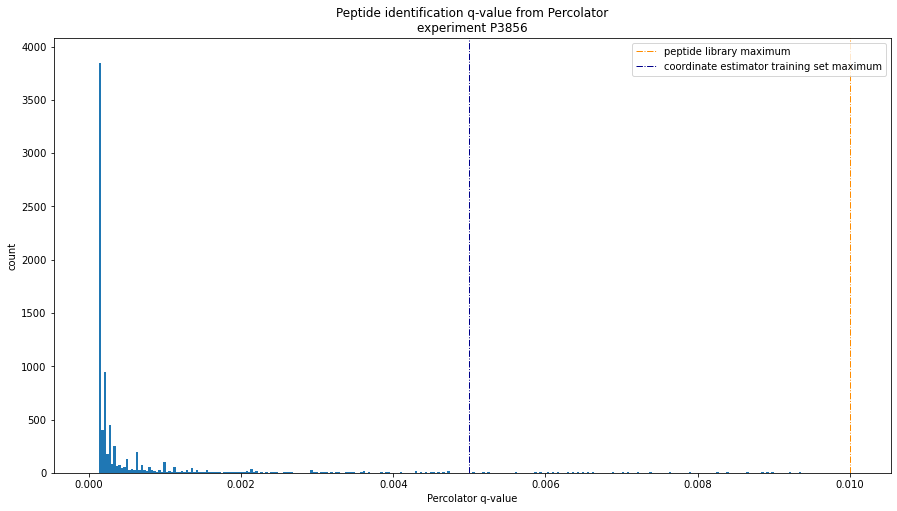

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
# values = sequences_df[sequences_df.q_value <= 0.05].q_value
values = sequences_df.q_value
y, x, _ = ax1.hist(values, bins=bins, label=None)

ax1.axvline(0.01, color='darkorange', lw=1.0, ls='-.', label='peptide library maximum')
ax1.axvline(0.005, color='darkblue', lw=1.0, ls='-.', label='coordinate estimator training set maximum')

plt.xlabel('Percolator q-value')
plt.ylabel('count')
plt.title('Peptide identification q-value from Percolator\nexperiment {}'.format(experiment_name))
# plt.xlim((0,0.01))
# plt.ylim((0,1000))

plt.legend(loc='best')

plt.show()

#### distribution of CCS base peak width

No handles with labels found to put in legend.


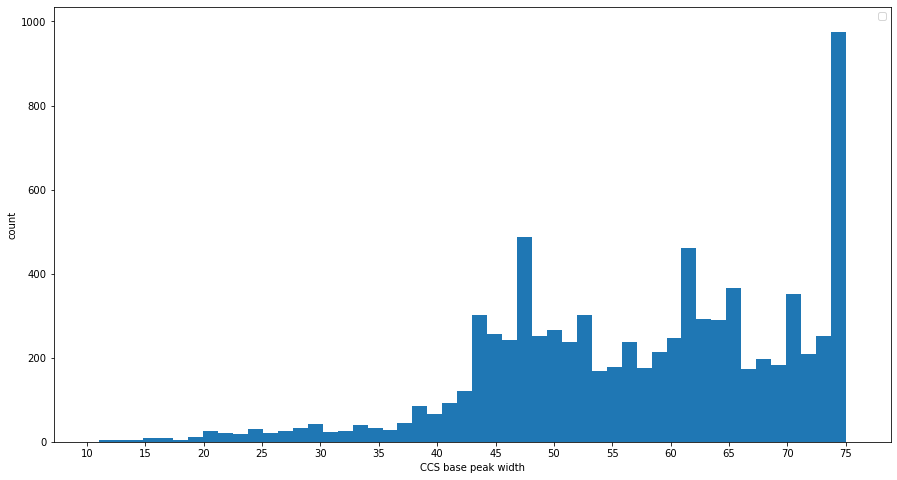

In [32]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 50
values = sequences_df.mean_scan_base_peak_width
y, x, _ = ax1.hist(values, bins=bins, label=None)

plt.xlabel('CCS base peak width')
plt.ylabel('count')
plt.title('')
# plt.xlim((0,0.01))
# plt.ylim((0,1000))

nearest = 5.0
range_l = round(sequences_df.mean_scan_base_peak_width.min() / nearest) * nearest
range_u = round(sequences_df.mean_scan_base_peak_width.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

plt.legend(loc='best')

plt.show()

#### distribution of RT base peak width

No handles with labels found to put in legend.


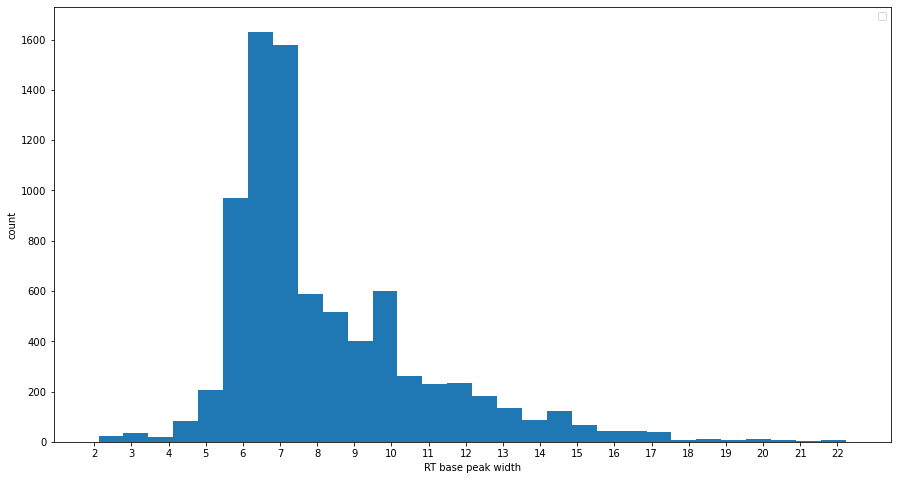

In [36]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 30
values = sequences_df.mean_rt_base_peak_width
y, x, _ = ax1.hist(values, bins=bins, label=None)

plt.xlabel('RT base peak width')
plt.ylabel('count')
plt.title('')
# plt.xlim((0,0.01))
# plt.ylim((0,1000))

nearest = 1.0
range_l = round(sequences_df.mean_rt_base_peak_width.min() / nearest) * nearest
range_u = round(sequences_df.mean_rt_base_peak_width.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

plt.legend(loc='best')

plt.show()